# Robustness to units mismatch

In [86]:
require('cowplot')
library('ggplot2')
source(file.path('..', 'commons','get_expected_pval_and_equiv_z.R'))
source(file.path('..', 'commons','plot_grid_methods_color_within.R'))
source(file.path('..', 'commons','multiplot.R'))
source(file.path('..', 'commons','plot_lib.R'))
source(file.path('..', 'commons','plot_qq_p.R'))
theme_set(theme_gray()) # switch to default ggplot2 theme for good

We look how contrast-based methods are affected by the units issue.

## One-sample tests

### Load data from the CSV files

In [87]:
# allsimudat_btw0 <- load_data_from_csv('^test1_k025_n20_btw0_.*', '/Volumes/camille/IBMA_simu/')
allsimudat_btw1 <- load_data_from_csv('^test1_k025_n20_btw1_.*', '/Volumes/camille/IBMA_simu/')
allsimudat <- rbind(allsimudat_btw1)

[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/units_mismatch/../data/allsimudat_test1_k025_n20_btw1_.csv"


Select contrast-based methods.

We look at $τ^2 = 1$ and only valid scenarii for each method:
 - MFX GLM: $σ^2_i/n_i$ constant
 - RFX GLM: anything
 - Contrast Permutation: anything 
 - Z Permutation: anything 
 - MFX Stouffers: anything 

In [88]:
# best_con_data_1 <- subset(con_data_1, 
#     (methods %in% c("megaMFX") & Between==1) | 
#     (methods %in% c("megaRFX") & Between==1) | 
#     (methods %in% c("megaFFX_FSL") & Between==0) |
#     (methods %in% c("permutCon")& Between==1)
#     )

# best_con_data_1_nom_ok <- subset(allsimudat, 
#     (methods %in% c("megaMFX") & withinVariation<8) |
#     (methods %in% setdiff(con_methods, c("megaMFX"))))

# best_con_data_3 <- subset(con_data_3, 
#     ((methods %in% c("megaMFX") & Between==1) | 
#      (methods %in% c("megaRFX"))  | 
#      (methods %in% c("megaFFX_FSL") & Between==0) |
#      (methods %in% c("permutCon"))
#     ) & nStudies==50)

### Plots

### Main figure

pdf 
  2

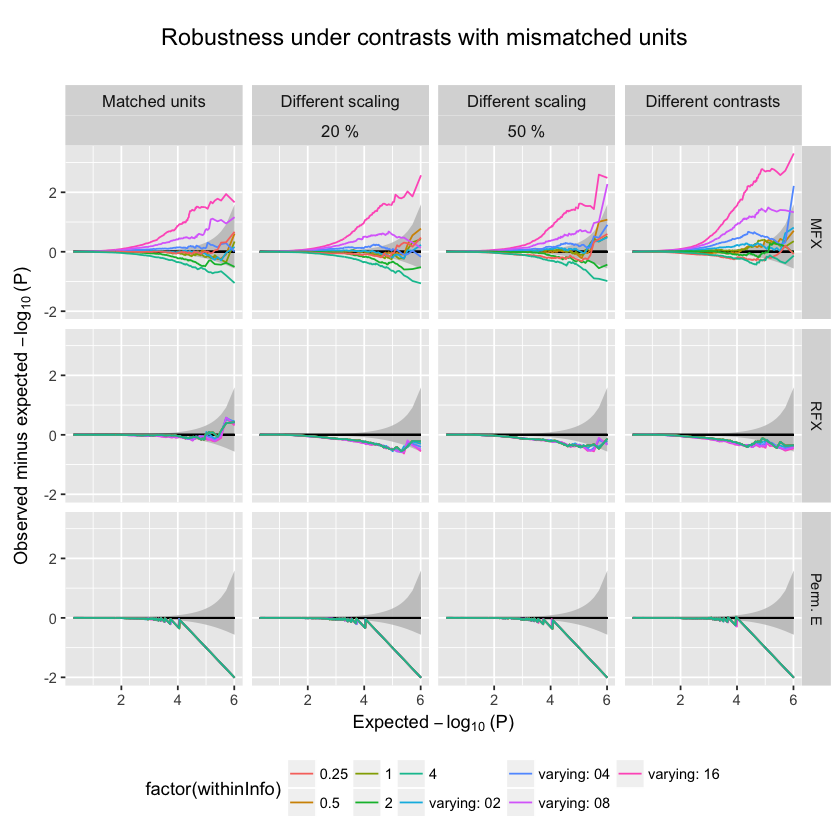

In [92]:
units_plot <- function(data, max_z=NA, lim=NA){
    
    con_methods <- c("megaMFX","megaRFX","permutCon")
    con_data <- subset(data, is.finite(expectedz) & expectedz>0  &  methods %in% con_methods)
    
    p <- plot_qq_p(list(con_data),  
              methods~unitMism+soft2, 
              '', 
              mult=FALSE, lim=lim, filename=NA, max_z=max_z) + 
        theme(legend.position="bottom") 

    title <- ggdraw() + draw_label(
        'Robustness under contrasts with mismatched units') 
    p <- plot_grid(title, p, ncol=1, rel_heights=c(0.1, 1))

    return(p)
}

p <- units_plot(allsimudat)

# print on screen
print(p)

# Save to pdf
pdf(paste("units.pdf", sep=""))
print(p)
dev.off()

##  Two-sample tests

### Load data from the CSV files

In [42]:
# allsimudat2_btw0 <- load_data_from_csv('^test2_k025_n20_btw0_.*', '/Volumes/camille/IBMA_simu/')
allsimudat2_btw1 <- load_data_from_csv('^test2_k025_n20_btw1_.*', '/Volumes/camille/IBMA_simu/')
allsimudat2 <- rbind(allsimudat2_btw1)

[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/units_mismatch/../data/allsimudat_test2_k025_n20_btw1_.csv"


In [94]:
best_con_data_2 <- subset(allsimudat2, 
    ((methods %in% c("megaMFX") & Between==1) | 
     (methods %in% c("megaRFX") & Between==1) | 
     (methods %in% c("megaFFX_FSL") & Between==0) |
     (methods %in% c("permutCon"))
    ))

# best_con_data_2_nom_ok <- subset(best_con_data_2, 
#     (methods %in% c("megaMFX") & withinVariation<4) |
#     (methods %in% setdiff(methods, c("megaFFX_FSL", "megaMFX"))))

### Main figure

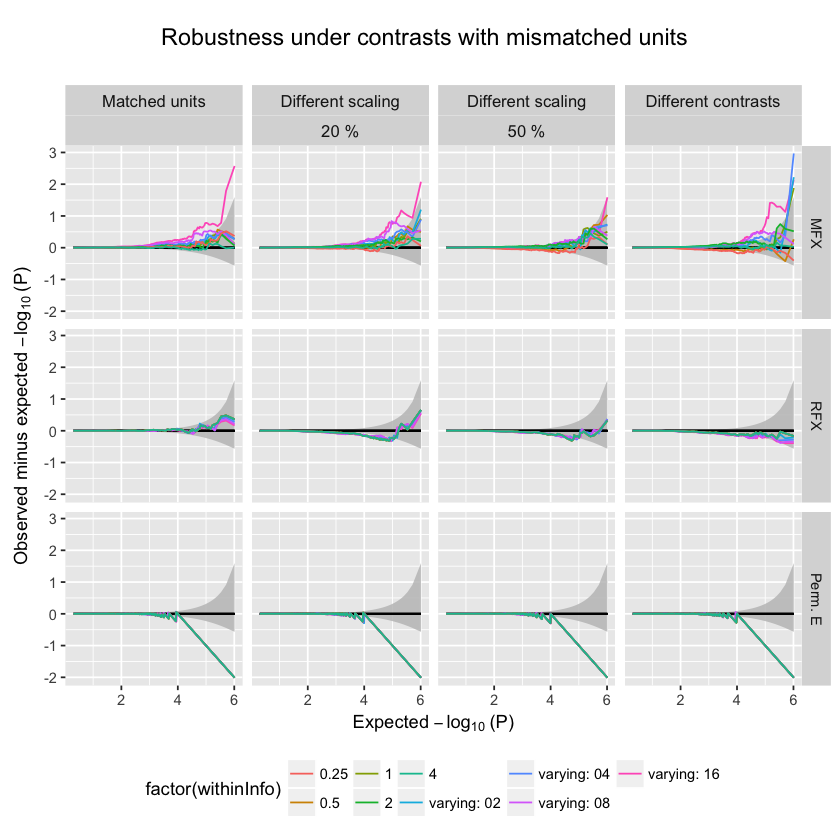

In [96]:
p <- units_plot(best_con_data_2)

# print on screen
print(p)

## Unbalanced two-sample tests

### Load data from the CSV files

In [81]:
allsimudat3_btw1 <- load_data_from_csv('^test3_k025_n20_btw1_.*', '/Volumes/camille/IBMA_simu/')
allsimudat3 <- rbind(allsimudat3_btw1)

[1] "Reading from  /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/units_mismatch/../data/allsimudat_test3_k025_n20_btw1_.csv"


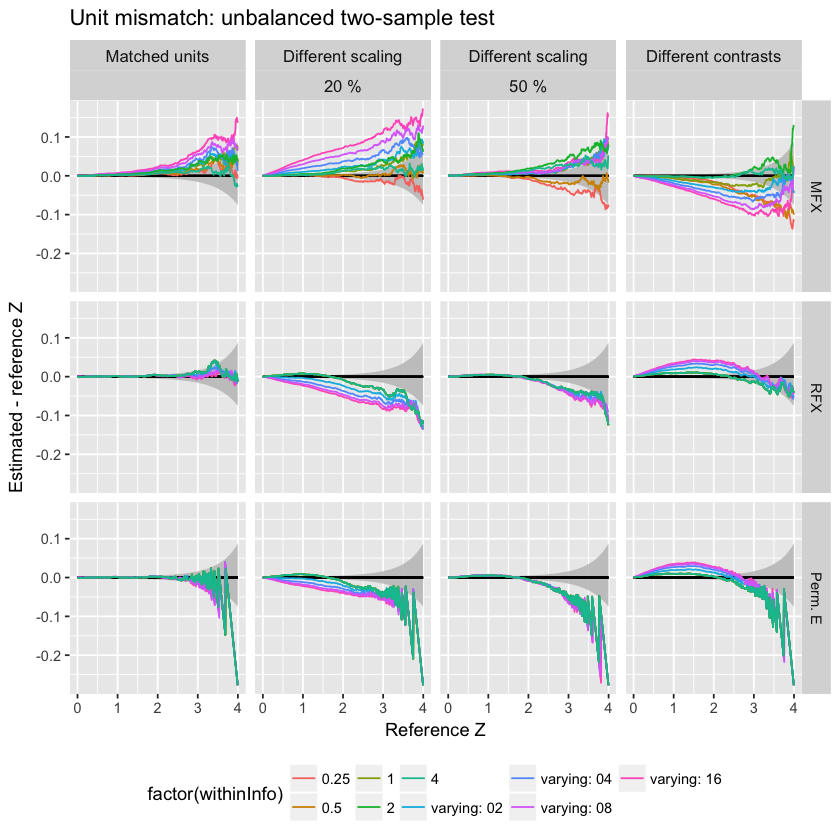

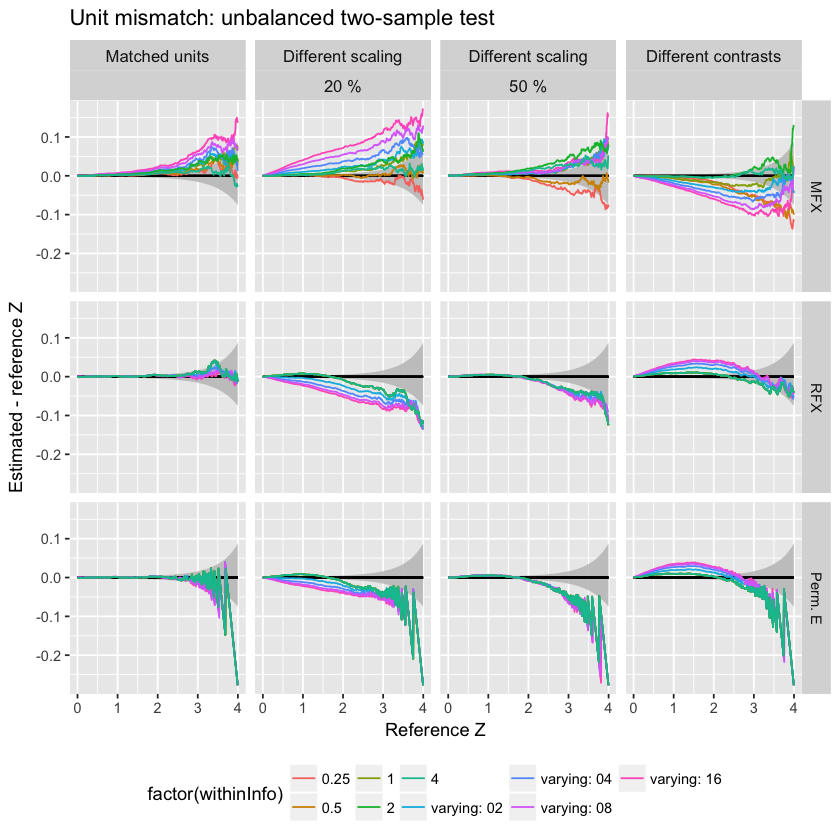

In [64]:
con_data_3 <- subset(allsimudat3, is.finite(expectedz) & expectedz>0 & methods %in% con_methods)
best_con_data_3 <- subset(con_data_3, 
    ((methods %in% c("megaMFX") & Between==1) | 
     (methods %in% c("megaRFX") )  | 
     (methods %in% c("megaFFX_FSL") & Between==0) |
     (methods %in% c("permutCon"))
    ) & nStudies==50)

plot_unit_mismatch(
    subset(best_con_data_3,((methods %in% c("megaRFX") & Between==1) | !(methods %in% c("megaRFX")))),
    'unbalanced two-sample test', mult=FALSE, single=TRUE, lim=NA,
     filename=file.path("..", "..", "zmeta_paper", "figures", "unitmimatch_test3"), max_z=4)

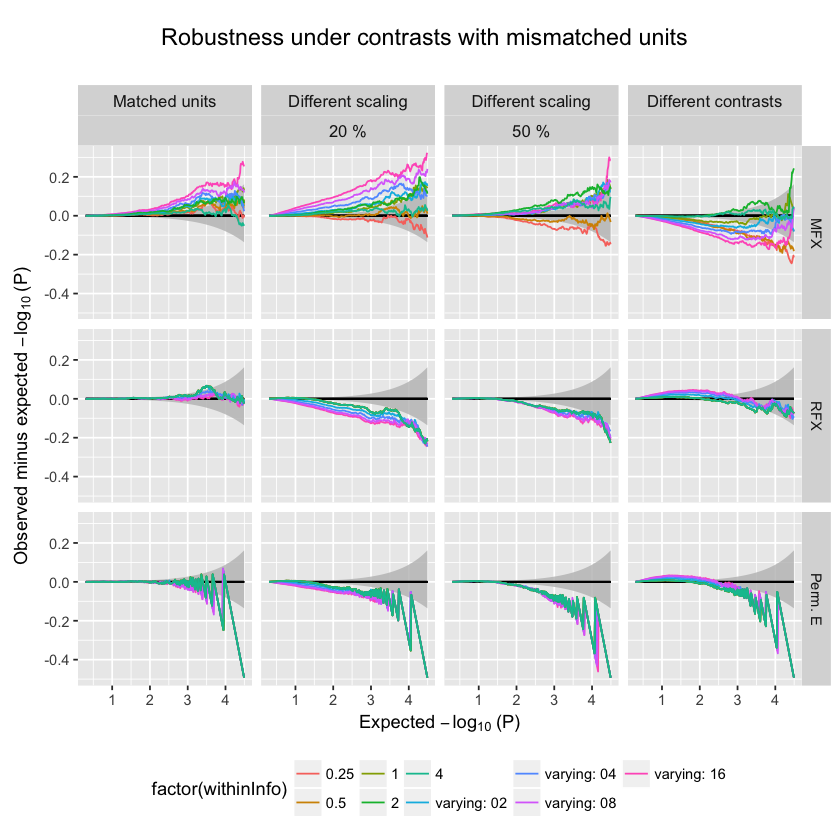

In [78]:
p <- units_plot(
    subset(best_con_data_3,((methods %in% c("megaRFX") & Between==1) 
                            | !(methods %in% c("megaRFX")))), 
    max_z=4)

# print on screen
print(p)

### 2. Robustness to small sample sizes

In [ ]:
con_data_1_small_sample <- subset(con_data_1, 
    ((methods %in% c("megaMFX") & Between==1) | 
     (methods %in% c("megaRFX"))  | 
     (methods %in% c("megaFFX_FSL") & Between==0) |
     (methods %in% c("permutCon"))
    ) & unitMism=="nominal")
con_data_2_small_sample <- subset(con_data_2, 
    ((methods %in% c("megaMFX") & Between==1) | 
     (methods %in% c("megaRFX"))  | 
     (methods %in% c("megaFFX_FSL") & Between==0) |
     (methods %in% c("permutCon"))
    ) & unitMism=="nominal")
con_data_3_small_sample <- subset(con_data_3, 
    ((methods %in% c("megaMFX") & Between==1) | 
     (methods %in% c("megaRFX"))  | 
     (methods %in% c("megaFFX_FSL") & Between==0) |
     (methods %in% c("permutCon"))
    ) & unitMism=="nominal")

In [ ]:
source('plot_lib.R')
source('plot_sample_sizes.R')
source('plot_blandaldman_z.R')
plot_sample_sizes(
    subset(con_data_1_small_sample, ((methods %in% c("megaRFX") & Between==1) | !(methods %in% c("megaRFX")))),
    title='one-sample test', lim=0.5,
    filename=file.path("..", "..", "..", "..", "zmeta_paper", "figures", "samplesizes_test1"), 
    max_z=4.5)

In [ ]:
aa=subset(con_data_2_small_sample, ((methods %in% c("megaRFX") & Between==1 & Within==5 & nStudies==100)))
aa=(aa[aa$expectedz>4,])
dim(aa)
(aa$expectedz)
(aa$z_lower-aa$expectedz)
(aa$z_upper-aa$expectedz)

In [ ]:
source('plot_blandaldman_z.R')
plot_sample_sizes(
    subset(con_data_2_small_sample, ((methods %in% c("megaRFX") & Between==1) | !(methods %in% c("megaRFX")))),
    title='two-sample test', lim=c(0.5, 0.1, 0.1),
    filename=file.path("..", "..", "..", "..", "zmeta_paper", "figures", "samplesizes_test2"), 
    max_z=4.5)

In [ ]:
max(con_data_2_small_sample[con_data_2_small_sample$nStudies==100,]$expectedz)

In [ ]:
plot_sample_sizes(
    subset(con_data_3_small_sample, ((methods %in% c("megaRFX") & Between==1) | !(methods %in% c("megaRFX")))),
    title='unbalanced two-sample test', lim=c(0.5, 0.1, 0.1),
    filename=file.path("..", "..", "..", "..", "zmeta_paper", "figures", "samplesizes_test3"), max_z=4.5)

### 2. Robustness to violation of underlying assumptions or ...

#### GLM MFX

In [ ]:
# con_data_MFX_not_assump <- rbind(subset(con_data_1, 
#     ((methods %in% c("megaMFX") & Between!=1)
#     ) & unitMism=="nominal"),subset(con_data_2, 
#     ((methods %in% c("megaMFX") & Between!=1)
#     ) & unitMism=="nominal"),subset(con_data_3, 
#     ((methods %in% c("megaMFX") & Between!=1)
#     ) & unitMism=="nominal"))

con_data_MFX_not_assump <- subset(con_data_3, 
    ((methods %in% c("megaMFX") & Between!=1)
    ) & unitMism=="nominal")

con_data_MFX_not_assump$nStudiesPerGroup <- con_data_MFX_not_assump$nStudies
con_data_MFX_not_assump$nStudiesPerGroup[con_data_MFX_not_assump$glm>1] <- con_data_MFX_not_assump[con_data_MFX_not_assump$glm>1,]$nStudiesPerGroup/2

In [ ]:
source('plot_blandaldman_z.R')
p <- plot_blandaldman_z(
    list(con_data_MFX_not_assump), 
    glm+methods~nStudiesPerGroup+Between, 
    "MFX: under true fixed-effects", FALSE, NA, NA, max_z=4.5)

# plot_sample_sizes(
#     subset(con_data_MFX_assump, 
#            expectedz<4),
#     title='MFX: underlying assumptions', lim=1.5)

In [ ]:
con_data_MFX_assump <- rbind(subset(con_data_1, 
    ((methods %in% c("megaMFX") & Between==1)
    ) & unitMism=="nominal"),subset(con_data_2, 
    ((methods %in% c("megaMFX") & Between==1)
    ) & unitMism=="nominal"),subset(con_data_3, 
    ((methods %in% c("megaMFX") & Between==1)
    ) & unitMism=="nominal"))

con_data_MFX_assump$nStudiesPerGroup <- con_data_MFX_assump$nStudies
con_data_MFX_assump$nStudiesPerGroup[con_data_MFX_assump$glm>1] <- con_data_MFX_assump[con_data_MFX_assump$glm>1,]$nStudiesPerGroup/2

In [ ]:
p <- plot_blandaldman_z(
    list(con_data_MFX_assump), 
    glm+methods~nStudiesPerGroup, 
    "MFX: under assumptions", FALSE, NA, NA, max_z=4.5)

In [ ]:
# con_data_1_small_sample <- subset(con_data_1, 
#     ((methods %in% c("megaMFX") & Between==1) | 
#      (methods %in% c("megaRFX") & Within==5)  | 
#      (methods %in% c("megaFFX_FSL") & Between==0) |
#      (methods %in% c("permutCon"))
#     ) & unitMism=="nominal")
con_data_1_MFX_assump <- subset(con_data_1, 
    ((methods %in% c("megaMFX") & Between!=1)
    ) & unitMism=="nominal")

In [ ]:
con_data_RFX_not_assump <- rbind(subset(con_data_1, 
    ((methods %in% c("megaRFX"))
    ) & unitMism=="nominal"),subset(con_data_2, 
    ((methods %in% c("megaRFX"))
    ) & unitMism=="nominal"),subset(con_data_3, 
    ((methods %in% c("megaRFX"))
    ) & unitMism=="nominal"))

con_data_RFX_not_assump$nStudiesPerGroup <- con_data_RFX_not_assump$nStudies
con_data_RFX_not_assump$nStudiesPerGroup[con_data_RFX_not_assump$glm>1] <- con_data_RFX_not_assump[con_data_RFX_not_assump$glm>1,]$nStudiesPerGroup/2

In [ ]:
p <- plot_blandaldman_z(
    list(con_data_RFX_not_assump),
    glm+methods+Between~nStudiesPerGroup, 
    "RFX: under varying within-study variance", 
    FALSE, lim=NA, max_z=4.5,
    filename=file.path("..", "..", "..", "..", "zmeta_paper", "figures", "rfx_assump"))

In [ ]:
p <- plot_blandaldman_z(
    list(subset(con_data_1, nStudies==50 & Between==1 & unitMism=="nominal" )),
    methods+unitMism~WithinSame+Within, 
    "RFX: under varying within-study variance", 
    FALSE, lim=0.05, max_z=4,
    filename=file.path("..", "..", "..", "..", "zmeta_paper", "figures", "rfx_assump"))

In [ ]:
num_simu = 30*30*30*38
print(num_simu)
min_p = 1/num_simu
print(min_p)
-qnorm(min_p)
max(con_data_1$expectedz)

In [ ]:
me_data <- rbind(subset(con_data_1, 
    ((methods %in% c("megaRFX"))
    ) & unitMism=="nominal"),subset(con_data_2, 
    ((methods %in% c("megaRFX"))
    ) & unitMism=="nominal"),subset(con_data_3, 
    ((methods %in% c("megaRFX"))
    ) & unitMism=="nominal"))

me_data$nStudiesPerGroup <- me_data$nStudies
me_data$nStudiesPerGroup[me_data$glm>1] <- me_data[me_data$glm>1,]$nStudiesPerGroup/2

p <- plot_blandaldman_z(
    list(me_data),
    glm+Between~nStudiesPerGroup+Within, 
    "RFX: under varying within-study variance", 
    FALSE, lim=NA, max_z=4.5)